### Image Classification using CNN with Tesnorflow



In [49]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2021-07-09 07:28:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   194MB/s    in 0.5s    

2021-07-09 07:28:55 (194 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [50]:
#Data has been take from kaggle food 101 dataset

In [51]:
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspecting the data
##Exploring and visualizing the data


In [52]:
!ls pizza_steak

test  train


In [53]:
!ls pizza_steak/train/


pizza  steak


In [54]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [55]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}")


There are 2 directories and 1
There are 2 directories and 1
There are 0 directories and 250
There are 0 directories and 250
There are 2 directories and 1
There are 0 directories and 750
There are 0 directories and 750


In [56]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul  9 06:02 .
drwxr-xr-x 1 root root 4096 Jul  9 07:28 ..
-rw-r--r-- 1 root root 6148 Jul  9 07:28 .DS_Store
drwxr-xr-x 4 root root 4096 Jul  9 06:02 test
drwxr-xr-x 4 root root 4096 Jul  9 06:02 train


In [57]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [58]:
#Vizualaizing the data

In [103]:
import pathlib 
import numpy as np
data_dir = pathlib.Path("Pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from the subdrectory
class_names = class_names[1:]
print(class_names)

[]


In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img  = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  #show the shape of the image

  return img

['1117936.jpg']
Image shape: (512, 512, 3)


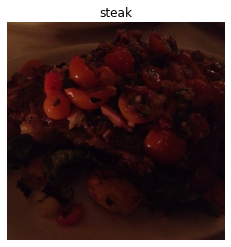

In [61]:
img  = view_random_image(target_dir = "pizza_steak/train/",target_class="steak")

In [62]:
img

array([[[105,  67,  30],
        [112,  74,  37],
        [114,  76,  39],
        ...,
        [ 49,  25,  23],
        [ 51,  27,  25],
        [ 52,  28,  26]],

       [[108,  70,  34],
        [107,  69,  33],
        [107,  69,  33],
        ...,
        [ 46,  22,  20],
        [ 47,  23,  21],
        [ 48,  24,  22]],

       [[110,  72,  36],
        [104,  66,  30],
        [103,  65,  29],
        ...,
        [ 46,  22,  22],
        [ 46,  22,  22],
        [ 46,  22,  22]],

       ...,

       [[ 77,  40,  24],
        [ 73,  37,  21],
        [ 70,  34,  20],
        ...,
        [ 34,  12,  14],
        [ 35,  13,  15],
        [ 37,  15,  17]],

       [[ 78,  41,  25],
        [ 75,  38,  22],
        [ 70,  34,  20],
        ...,
        [ 35,  13,  15],
        [ 35,  13,  15],
        [ 37,  15,  17]],

       [[ 74,  37,  21],
        [ 72,  35,  19],
        [ 69,  33,  19],
        ...,
        [ 37,  15,  17],
        [ 37,  15,  17],
        [ 38,  16,  18]]

In [63]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[105,  67,  30],
        [112,  74,  37],
        [114,  76,  39],
        ...,
        [ 49,  25,  23],
        [ 51,  27,  25],
        [ 52,  28,  26]],

       [[108,  70,  34],
        [107,  69,  33],
        [107,  69,  33],
        ...,
        [ 46,  22,  20],
        [ 47,  23,  21],
        [ 48,  24,  22]],

       [[110,  72,  36],
        [104,  66,  30],
        [103,  65,  29],
        ...,
        [ 46,  22,  22],
        [ 46,  22,  22],
        [ 46,  22,  22]],

       ...,

       [[ 77,  40,  24],
        [ 73,  37,  21],
        [ 70,  34,  20],
        ...,
        [ 34,  12,  14],
        [ 35,  13,  15],
        [ 37,  15,  17]],

       [[ 78,  41,  25],
        [ 75,  38,  22],
        [ 70,  34,  20],
        ...,
        [ 35,  13,  15],
        [ 35,  13,  15],
        [ 37,  15,  17]],

       [[ 74,  37,  21],
        [ 72,  35,  19],
        [ 69,  33,  19],
        ...,
        [ 37,  15,  1

In [64]:
#View the image shape
img.shape

(512, 512, 3)

In [65]:
#Get all the pixel between 0 and 1 (Normalizing the data)
img/255

array([[[0.41176471, 0.2627451 , 0.11764706],
        [0.43921569, 0.29019608, 0.14509804],
        [0.44705882, 0.29803922, 0.15294118],
        ...,
        [0.19215686, 0.09803922, 0.09019608],
        [0.2       , 0.10588235, 0.09803922],
        [0.20392157, 0.10980392, 0.10196078]],

       [[0.42352941, 0.2745098 , 0.13333333],
        [0.41960784, 0.27058824, 0.12941176],
        [0.41960784, 0.27058824, 0.12941176],
        ...,
        [0.18039216, 0.08627451, 0.07843137],
        [0.18431373, 0.09019608, 0.08235294],
        [0.18823529, 0.09411765, 0.08627451]],

       [[0.43137255, 0.28235294, 0.14117647],
        [0.40784314, 0.25882353, 0.11764706],
        [0.40392157, 0.25490196, 0.11372549],
        ...,
        [0.18039216, 0.08627451, 0.08627451],
        [0.18039216, 0.08627451, 0.08627451],
        [0.18039216, 0.08627451, 0.08627451]],

       ...,

       [[0.30196078, 0.15686275, 0.09411765],
        [0.28627451, 0.14509804, 0.08235294],
        [0.2745098 , 0

In [66]:
#Building CNN to find patterns in images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 , also  called normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          target_size = (224,224),
                                          class_mode = "binary",
                                          seed = 42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                                 kernel_size = 3,
                                                                 activation = "relu",
                                                                 input_shape = (224,224,3)),
                                       tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                       tf.keras.layers.MaxPool2D(pool_size = 2,
                                                                 padding = "valid"),
                                       tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                       tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                       tf.keras.layers.Conv2D(10,3,activation = "relu"),
                                       tf.keras.layers.MaxPool2D(2),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1,activation = "sigmoid")])

#compile CNN

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 114s 2s/step - loss: 0.5992 - accuracy: 0.6747 - val_loss: 0.5705 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 112s 2s/step - loss: 0.4538 - accuracy: 0.7853 - val_loss: 0.3688 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 0.4228 - accuracy: 0.8173 - val_loss: 0.3731 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 112s 2s/step - loss: 0.3913 - accuracy: 0.8267 - val_loss: 0.3544 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.3535 - accuracy: 0.8500 - val_loss: 0.3428 - val_accuracy: 0.8380


In [67]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 104, 104, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 52, 52, 10)       

In [68]:
def plots_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

#plot loss
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label= "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

# Plot accuracy
  plt.plot(epochs,loss,label = "training_accuracy")
  plt.plot(epochs,val_loss,label= "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



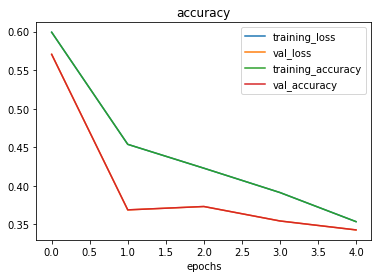

In [69]:
plots_loss_curves(history_1)

In [70]:
#here since validation loss starts to increase it's likely that model is overfitting
model_2 = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
                      tf.keras.layers.MaxPool2D(pool_size = 2),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1,activation="sigmoid")

])

In [71]:
#Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [72]:
#Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.6010 - accuracy: 0.6720 - val_loss: 0.4831 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.4770 - accuracy: 0.7873 - val_loss: 0.4065 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4286 - accuracy: 0.8193 - val_loss: 0.3533 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4047 - accuracy: 0.8267 - val_loss: 0.4013 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.4032 - accuracy: 0.8267 - val_loss: 0.3294 - val_accuracy: 0.8520


In [73]:
#Geting a summary of model with max pooling
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6760)             

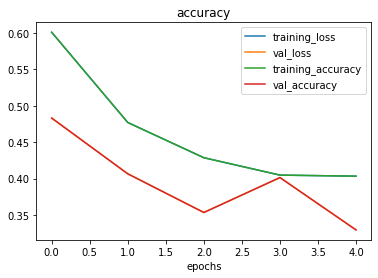

In [74]:
plots_loss_curves(history_2)

In [75]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range  = 0.3,
                                             horizontal_flip = True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [76]:
#Visualizing the data Augmentation..
#Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)

#Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size =(224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

IMG_SIZE = (224,224)

#Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [77]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()



showing image number:  1


(-0.5, 223.5, 223.5, -0.5)

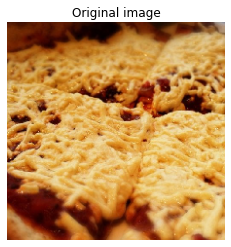

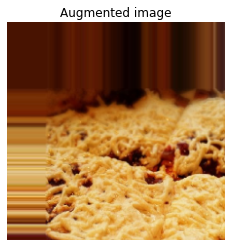

In [78]:
#Showing original image and augmented image
import random
random_number = random.randint(0,32) #Since batch size is 32
print(f"showing image number:  {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [79]:
#Create a model 
model_3 = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(pool_size = 2),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1,activation="sigmoid")

])

#Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.7044 - accuracy: 0.5060 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6948 - accuracy: 0.4987 - val_loss: 0.6922 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.6932 - accuracy: 0.5320 - val_loss: 0.6897 - val_accuracy: 0.6340
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.6885 - accuracy: 0.5947 - val_loss: 0.6705 - val_accuracy: 0.5260
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.6790 - accuracy: 0.5800 - val_loss: 0.6240 - val_accuracy: 0.7260


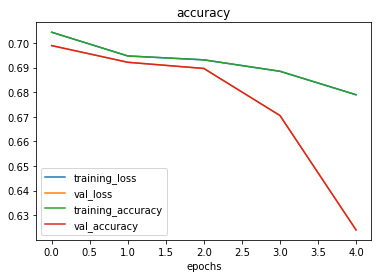

In [80]:
plots_loss_curves(history_3)

In [81]:
#Now let's shuffle the augmented training data and train another model and see what happens
#import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = True)



Found 1500 images belonging to 2 classes.


In [82]:
#Create a model 
model_4 = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
                      tf.keras.layers.MaxPool2D(pool_size = 2),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Conv2D(10,3,activation = "relu"),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1,activation="sigmoid")

])

#Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.6547 - accuracy: 0.5953 - val_loss: 0.5544 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.5717 - accuracy: 0.7033 - val_loss: 0.4009 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.5136 - accuracy: 0.7667 - val_loss: 0.3527 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.4912 - accuracy: 0.7640 - val_loss: 0.3357 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.4626 - accuracy: 0.7900 - val_loss: 0.3228 - val_accuracy: 0.8520


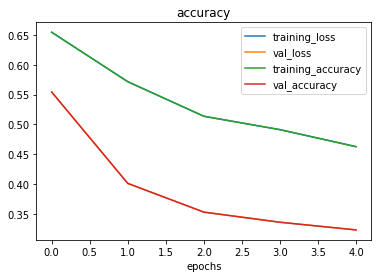

In [83]:
#plot loss curves
plots_loss_curves(history_4)

In [92]:
#Making a prediction with trained model on custom data
print(class_names)

[]


--2021-07-09 07:58:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  11.6MB/s    in 0.2s    

2021-07-09 07:58:56 (11.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

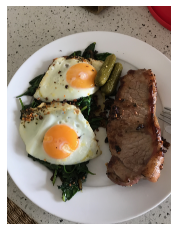

In [87]:
#view the example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [88]:
#Check the shape of image
steak.shape

(4032, 3024, 3)

In [89]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [93]:
#Creating a function to import and resize image it to be used with our model
def load_and_prep_image(filename,img_shape=224):

  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape,img_shape,colour_channels)
  """
  #Read in the image
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img,size=[img_shape, img_shape])

  #Rescale the image (get all values between 0 and 1)
  img = img/225
  return img

In [94]:
#Load in andpreproess our custom data 
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [105]:
pred = model_4.predict(tf.expand_dims(steak,axis=0))


In [100]:
class_names

array([], dtype=float64)

In [107]:
class_names = ['pizza','steak']

In [111]:
#Indexing the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int (tf.round(pred))]
pred_class

'steak'